Introduction
============

This is interactive notebook regarding "Introduction to path planning". (Author: Björn Hein)

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This notebook imports all discussed algorithms and does a comparison

**Attention**: This worksheet has external dependencies 

* to the files "InnoKonz2dEnv.py" or "InnoKonzShapelyEnv.py". These files contain simple 2D environments based on numpy arrays or the shapely library with an interface for the use as collision checking in the algorithms.
* to all modules like "**Algorithm**.py", which contains the corresponding algorithms 

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll

Adding all planners
===========


In [17]:
import sys
sys.path.append("templates")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of IPBasicGaussian failed: Traceback (most recent call last):
  File "c:\Users\jonas\Documents\08_Master\Python_Projekte\Roboter_Programmierung\Roboterprogrammierung_Projektarbeit\venv\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\jonas\Documents\08_Master\Python_Projekte\Roboter_Programmierung\Roboterprogrammierung_Projektarbeit\venv\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\jonas\AppData\Local\Programs\Python\Python39\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\jonas\AppData\Local\Programs\Python\Python39\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228

In [23]:
from IPPerfMonitor import IPPerfMonitor
import IPBasicPRM
import IPVISBasicPRM
import IPBasicGaussian



#import IKKClosestPRM # for visualization IKVISBasicPRM is used



#import IKLazyPRM
#import IKVISLazyPRM

#import IKRRT
#import IKVISRRT

#import IKAStar
#import IKVISAStar

Set-up of the test scenario and the configuration for all planner
===================================

Following a procedure to compare all discussed planners are shown:

1. Configuration for every planner is defined
2. The configuration and the planner is stored in the variable setup, a Python dict()
3. the variable setup is then used to uniformly call the planning calls


In [30]:
plannerFactory = dict()
basicConfig = dict()
basicConfig["radius"] = 5
basicConfig["numNodes"] = 400
plannerFactory["basePRM"] = [IPBasicPRM.BasicPRM, basicConfig, IPVISBasicPRM.basicPRMVisualize]

basicConfig2 = dict()
basicConfig2["radius"] = 3
basicConfig2["numNodes"] = 300
plannerFactory["basePRM2"] = [IPBasicPRM.BasicPRM, basicConfig2, IPVISBasicPRM.basicPRMVisualize]

""""
basicConfig_NN = dict()
basicConfig_NN["radius"] = 3
basicConfig_NN["numNodes"] = 300
plannerFactory["basePRM_NN"] = [IPBasicPRM_NN.BasicPRM_NN, basicConfig_NN, IPVISBasicPRM.basicPRMVisualize]
"""
basicConfig3 = dict()
basicConfig3["radius"] = 3
basicConfig3["numNodes"] = 300
plannerFactory["simple_Gaussian"] = [IPBasicGaussian._simple_Gaussian, basicConfig3, IPVISBasicPRM.basicPRMVisualize]



#lazyConfig = dict()
#lazyConfig["initialRoadmapSize"] = 40 
#lazyConfig["updateRoadmapSize"]  = 20 
#lazyConfig["kNearest"] = 5 
#plannerFactory["lazyPRM"] = [IKLazyPRM.LazyPRM, lazyConfig, IKVISLazyPRM.lazyPRMVisualize]

#astarConfig = dict()
#astarConfig["heuristic"] = 'euclidean' 
#astarConfig["w"]  = 0.5
#plannerFactory["astar"] = [IKAStar.AStar, astarConfig, IKVISAStar.aStarVisualize]

#rrtSimpleConfig = dict()
#rrtSimpleConfig["numberOfGeneratedNodes"] = 300 
#rrtSimpleConfig["testGoalAfterNumberOfNodes"]  = 10
#plannerFactory["simpleRRT"] = [IKRRT.RRTSimple, rrtSimpleConfig, IKVISBasicPRM.basicPRMVisualize]


[autoreload of IPBasicGaussian failed: Traceback (most recent call last):
  File "c:\Users\jonas\Documents\08_Master\Python_Projekte\Roboter_Programmierung\Roboterprogrammierung_Projektarbeit\venv\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\jonas\Documents\08_Master\Python_Projekte\Roboter_Programmierung\Roboterprogrammierung_Projektarbeit\venv\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\jonas\AppData\Local\Programs\Python\Python39\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\jonas\AppData\Local\Programs\Python\Python39\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228

In [31]:
class ResultCollection (object):
    
    def __init__(self, plannerFactoryName, planner, benchmark, solution, perfDataFrame):
        self.plannerFactoryName = plannerFactoryName
        self.planner = planner
        self.benchmark = benchmark
        self.solution = solution
        self.perfDataFrame = perfDataFrame

In [32]:
import IPTestSuite
import importlib

In [33]:
importlib.reload(IPTestSuite)

<module 'IPTestSuite' from 'c:\\Users\\jonas\\Documents\\08_Master\\Python_Projekte\\Roboter_Programmierung\\Roboterprogrammierung_Projektarbeit\\IPTestSuite.py'>

In [34]:
for benchmark in IPTestSuite.benchList:
    print(benchmark.name)

Trap
Bottleneck
Fat bottleneck
Spirals
Entrance
Entrances
KIT
Inside
SSL
Ring
Hemispheres
Hammerhead
Zigzag
Spiral
medium
medium2
L-square
Teeth
Gearshift
Squares_easy
Zigzag_medium
Zigzag_hard
Japan
Haystack
HairPerson


In [35]:
resultList = list()

for key,producer in list(plannerFactory.items()):
    for benchmark in IPTestSuite.benchList[:3]:
        print ("Planning: " + key + " - " + benchmark.name)
        planner = producer[0](benchmark.collisionChecker)
        IPPerfMonitor.clearData()
        #try:
            
        resultList.append(ResultCollection(key,
                                           planner, 
                                           benchmark, 
                                           planner.planPath(benchmark.startList,benchmark.goalList,producer[1]),
                                           IPPerfMonitor.dataFrame()
                                          ),
                        )
        #except Exception as e:
        #    throw e
        #    print ("PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR ")
        #    pass
            



Planning: basePRM - Trap
Planning: basePRM - Bottleneck
Planning: basePRM - Fat bottleneck
Planning: basePRM2 - Trap
Planning: basePRM2 - Bottleneck
Planning: basePRM2 - Fat bottleneck
Planning: simple_Gaussian - Trap


TypeError: simple_Gaus_Sampling() takes 1 positional argument but 2 were given

In [9]:
print(plannerFactory.items())

dict_items([('basePRM', [<class 'IPBasicPRM.BasicPRM'>, {'radius': 5, 'numNodes': 400}, <function basicPRMVisualize at 0x0000026A275CD3A0>]), ('basePRM2', [<class 'IPBasicPRM.BasicPRM'>, {'radius': 3, 'numNodes': 300}, <function basicPRMVisualize at 0x0000026A275CD3A0>]), ('visibilityPRM', [<class 'IPVisibilityPRM.VisPRM'>, {'ntry': 150}, <function visibilityPRMVisualize at 0x0000026A282144C0>])])


c:\Users\Jonas\Documents\Python_Projekte\Roboter_Programmierung\RP_Vorlesung\venv\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


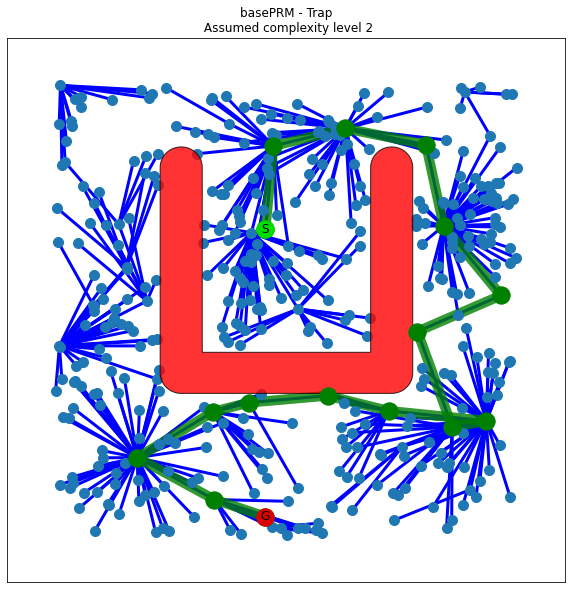

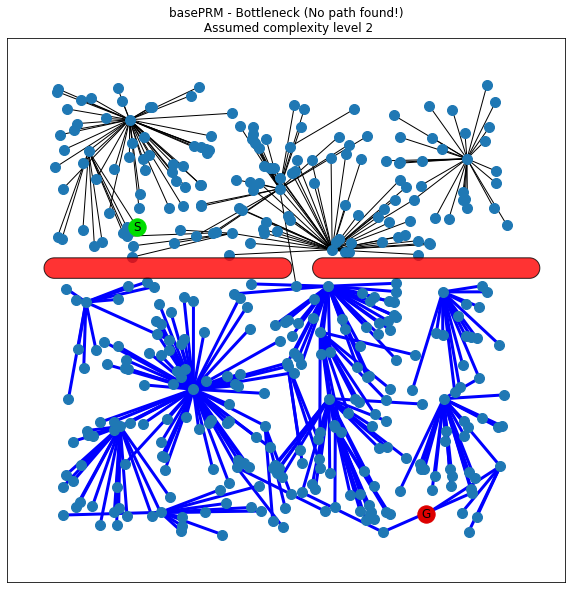

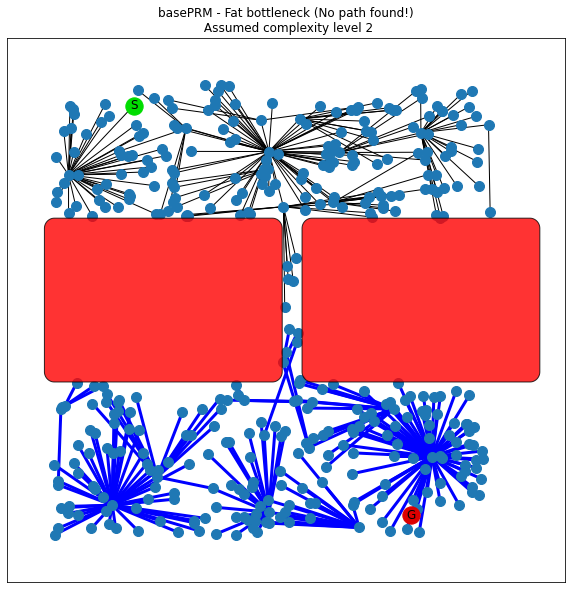

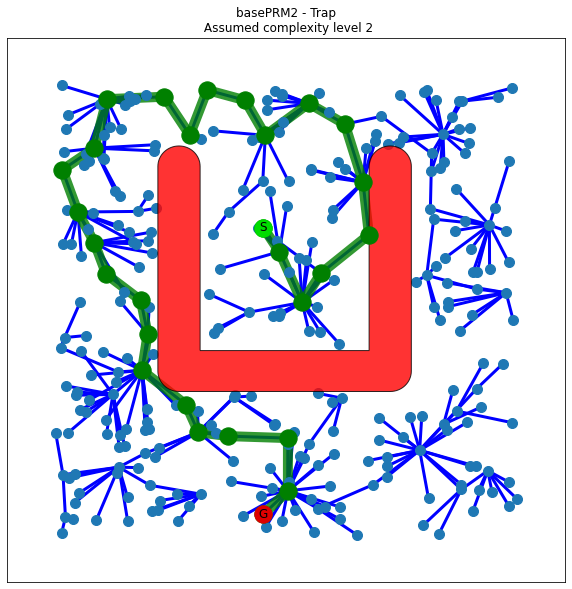

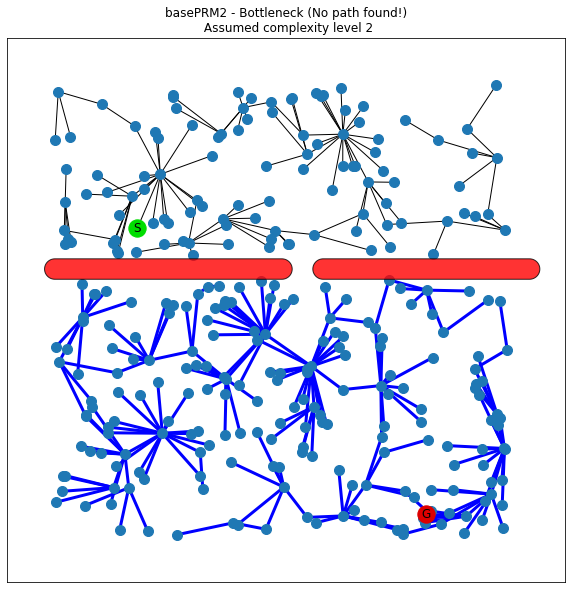

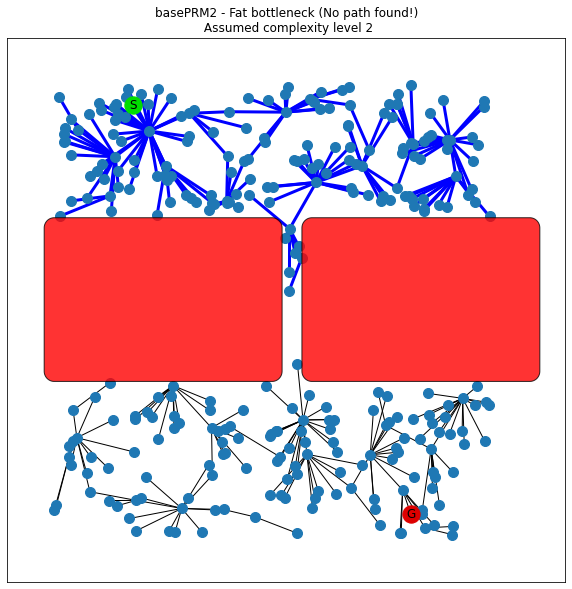

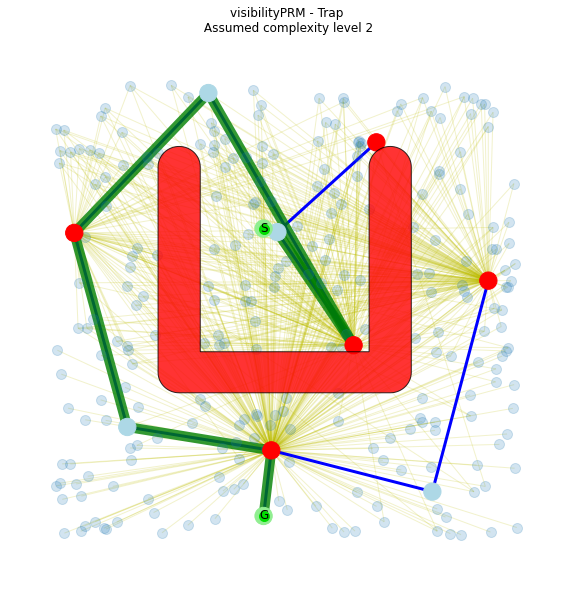

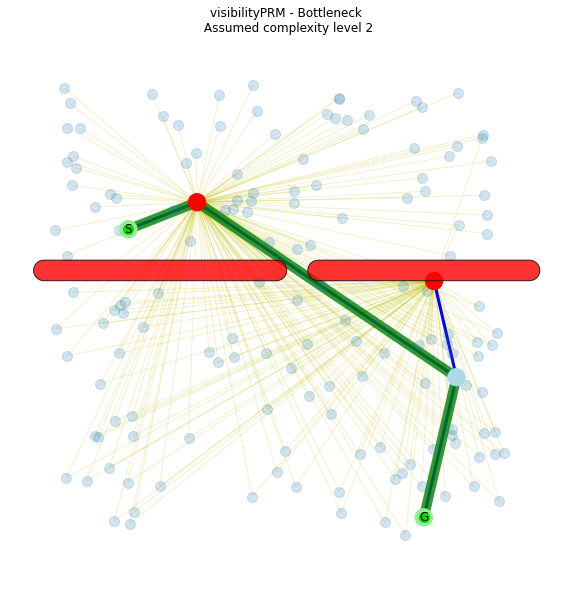

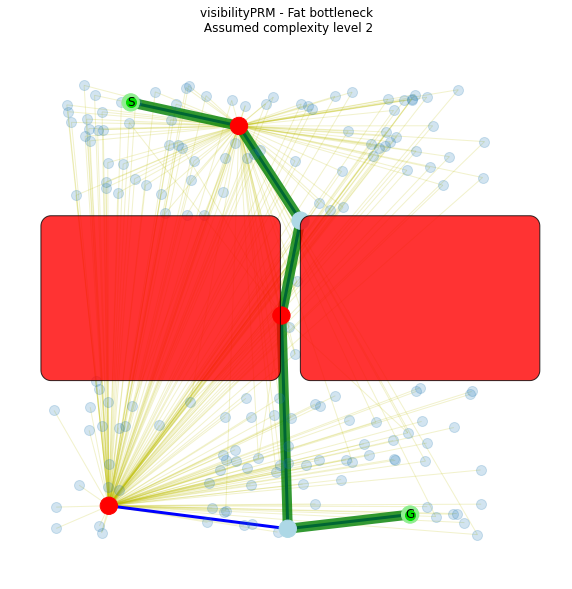

In [10]:
import matplotlib.pyplot as plt

for result in resultList:
    
    fig_local = plt.figure(figsize=(10,10))
    ax = fig_local.add_subplot(1,1,1)
    title = result.plannerFactoryName + " - " + result.benchmark.name
    if result.solution == []:
        title += " (No path found!)"
    title += "\n Assumed complexity level " + str(result.benchmark.level)
    ax.set_title(title)
    try:
        plannerFactory[result.plannerFactoryName][2](result.planner, result.solution, ax=ax, nodeSize=100)
    except:
        pass
    

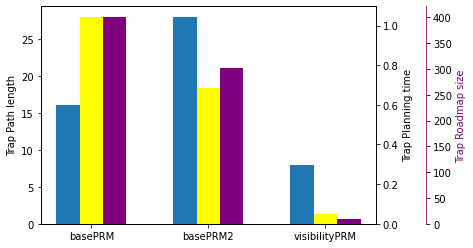

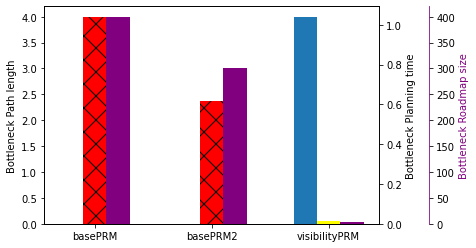

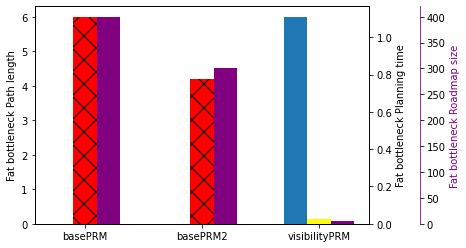

In [11]:
import numpy as np
for bench in IPTestSuite.benchList[:3]:
    title = bench.name
    pathLength = dict()
    planningTime = dict()
    roadmapSize  = dict()
    
    for result in resultList:
        if result.benchmark.name == bench.name:
            #print result.benchmark.name  + " - " +  result.plannerFactoryName, len(result.solution)
            pathLength[result.plannerFactoryName] = len(result.solution)
            planningTime[result.plannerFactoryName] = result.perfDataFrame.groupby(["name"]).sum()["time"]["planPath"]
            roadmapSize[result.plannerFactoryName] = result.planner.graph.size()
    
    
    fig, ax = plt.subplots()
    
    width = 0.2
    
    ax.bar(np.arange(len(pathLength.keys())), pathLength.values(),width)
    ax.set_ylabel(title + " Path length")
    ax.set_xticks(np.arange(len(pathLength.keys())) + width)
    ax.set_xticklabels(pathLength.keys())

    ax2 = ax.twinx()
    bar = ax2.bar(np.arange(len(pathLength.keys()))+width, planningTime.values(),width, color="red")
    ax2.set_ylabel(title + " Planning time")

    # Add coloring and patterns on axis two
    hatches = ['x' if length==0 else '' for length in pathLength.values()]
    color   = ['red' if length==0 else 'yellow' for length in pathLength.values()]
    for i,thisbar in enumerate(bar.patches):
        thisbar.set_facecolor(color[i])
        thisbar.set_hatch(hatches[i])

    # Multiple axes 
    ax3 = ax.twinx()
    ax3.bar(np.arange(len(pathLength.keys()))+2*width, roadmapSize.values(),width, color="purple")
    ax3.set_ylabel(title + " Roadmap size",  color="purple")
    ax3.spines['right'].set_position(('axes', 1.15))
    ax3.spines['right'].set_color("purple")
    

    
        
    

In [12]:
result.perfDataFrame

,name,args,kwargs,retVal,time
0,_getRandomFreePosition,(<IPVisibilityPRM.VisPRM object at 0x0000026A2...,{},"[2.9029717636349774, 1.4249017947637919]",0.0
1,_getRandomFreePosition,(<IPVisibilityPRM.VisPRM object at 0x0000026A2...,{},"[9.424816135915218, 19.857884242667232]",0.0
2,_getRandomFreePosition,(<IPVisibilityPRM.VisPRM object at 0x0000026A2...,{},"[15.112337454068665, 3.541272842423237]",0.0
3,_getRandomFreePosition,(<IPVisibilityPRM.VisPRM object at 0x0000026A2...,{},"[2.773964093689607, 17.145792253383473]",0.0
4,_getRandomFreePosition,(<IPVisibilityPRM.VisPRM object at 0x0000026A2...,{},"[2.7542998063120545, 16.861938878221782]",0.0
...,...,...,...,...,...
725,lineInCollision,(<IPEnvironment.CollisionChecker object at 0x0...,{},False,0.0
726,lineInCollision,(<IPEnvironment.CollisionChecker object at 0x0...,{},True,0.0
727,lineInCollision,(<IPEnvironment.CollisionChecker object at 0x0...,{},False,0.0
728,lineInCollision,(<IPEnvironment.CollisionChecker object at 0x0...,{},False,0.0
